# Visualisation of Geo-Data using the plotting library Makie.jl and various geodata libraries

- 27 April - 2 May 2025
- EGU25, Vienna Austria

- Lazaro Alonso (`@lazarusA`), Mauro Werder (`@mauro3`)
- Milan Kloewer (`@milankl`), Ludovic Raess (`@luraess`)
- Simone Silvestri (`@simone-silvestri`)



![t2m_extremes](./figures/t2m_despair_w.png)
> `t2m_dispair` from [LittlePieces](https://github.com/lazarusA/LittlePieces)

### Some useful links:

- https://juliadatacubes.github.io/YAXArrays.jl/dev/
- https://docs.makie.org/stable/
- https://rafaqz.github.io/DimensionalData.jl/dev/
- https://github.com/SpeedyWeather/SpeedyWeather.jl
- https://github.com/CliMA/Oceananigans.jl
- https://github.com/mauro3/WhereTheWaterFlows.jl

In [6]:
# Julia version
VERSION

v"1.11.4"

In [7]:
pwd()

"/Users/lalonso/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata"

In [8]:
using Pkg; Pkg.activate("./")

  Activating new project at `~/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata`


In [12]:
# 3m 0.8s
Pkg.add([
    "YAXArrays",
    "NetCDF",
    "Zarr",
    "Dates",
    "CairoMakie",
    "AlgebraOfGraphics", # + 40.9s
    "DimensionalData",
    "Downloads"
    ]
    )

   Resolving package versions...
  No Changes to `~/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata/Project.toml`
  No Changes to `~/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata/Manifest.toml`


In [14]:
# very IMPORTANT when reporting issues
Pkg.status()

Status `~/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata/Project.toml`
  [cbdf2221] AlgebraOfGraphics v0.10.3
  [13f3f980] CairoMakie v0.13.4
  [0703355e] DimensionalData v0.29.15
  [30363a11] NetCDF v0.12.2
  [c21b50f5] YAXArrays v0.6.1
  [0a941bbe] Zarr v0.9.4
  [ade2ca70] Dates v1.11.0
  [f43a241f] Downloads v1.6.0


## Loading data

### NetCDF

In [15]:
using YAXArrays, NetCDF, Downloads

┌ Info: new driver key :netcdf, updating backendlist.
└ @ NetCDFExt /Users/lalonso/.julia/packages/YAXArrayBase/M48vP/ext/NetCDFExt.jl:110


In [16]:
url = "https://www.unidata.ucar.edu/software/netcdf/examples/tos_O1_2001-2002.nc"
filename = Downloads.download(url, "tos_O1_2001-2002.nc"); # you pick your own path

In [17]:
c_small = Cube(filename)

┌ 180×170×24 YAXArray{Union{Missing, Float32}, 3} ┐
├─────────────────────────────────────────────────┴────────────────────── dims ┐
  ↓ lon  Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points,
  ↗ time Sampled{CFTime.DateTime360Day} [CFTime.DateTime360Day(2001-01-16T00:00:00), …, CFTime.DateTime360Day(2002-12-16T00:00:00)] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"          => "K"
  "missing_value"  => 1.0f20
  "history"        => " At   16:37:23 on 01/11/2005: CMOR altered the data in t…
  "cell_methods"   => "time: mean (interval: 30 minutes)"
  "name"           => "tos"
  "long_name"      => "Sea Surface Temperature"
  "original_units" => "degC"
  "standard_name"  => "sea_surface_temperature"
  "_FillValue"     => 1.0f20
  "original_name"  => "sosstsst"
├────────────────────────────────

### Zarr

In [18]:
using Zarr, YAXArrays
store ="gs://cmip6/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp585/r1i1p1f1/3hr/tas/gn/v20190710/"

┌ Info: new driver key :zarr, updating backendlist.
└ @ ZarrExt /Users/lalonso/.julia/packages/YAXArrayBase/M48vP/ext/ZarrExt.jl:8


"gs://cmip6/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp585/r1i1p1f1/3hr/tas/gn/v20190710/"

In [19]:
g = open_dataset(zopen(store, consolidated=true))

YAXArray Dataset
Shared Axes: 
None
Variables: 
height

Variables with additional axes:
  Additional Axes: 
  (↓ lon  Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ time Sampled{DateTime} [2015-01-01T03:00:00, …, 2101-01-01T00:00:00] ForwardOrdered Irregular Points)
  Variables: 
  tas

Properties: Dict{String, Any}("initialization_index" => 1, "realm" => "atmos", "variable_id" => "tas", "external_variables" => "areacella", "branch_time_in_child" => 60265.0, "data_specs_version" => "01.00.30", "history" => "2019-07-21T06:26:13Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.", "forcing_index" => 1, "parent_variant_label" => "r1i1p1f1", "table_id" => "3hr"…)


In [20]:
# select the variable
c_big = g["tas"]

┌ 384×192×251288 YAXArray{Float32, 3} ┐
├─────────────────────────────────────┴────────────────────────────────── dims ┐
  ↓ lon  Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ time Sampled{DateTime} [2015-01-01T03:00:00, …, 2101-01-01T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (usually, 2 meter) air temperature"


## Basic plots and statistics

In [21]:
using CairoMakie
CairoMakie.activate!()

In [22]:
c_small

┌ 180×170×24 YAXArray{Union{Missing, Float32}, 3} ┐
├─────────────────────────────────────────────────┴────────────────────── dims ┐
  ↓ lon  Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points,
  ↗ time Sampled{CFTime.DateTime360Day} [CFTime.DateTime360Day(2001-01-16T00:00:00), …, CFTime.DateTime360Day(2002-12-16T00:00:00)] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"          => "K"
  "missing_value"  => 1.0f20
  "history"        => " At   16:37:23 on 01/11/2005: CMOR altered the data in t…
  "cell_methods"   => "time: mean (interval: 30 minutes)"
  "name"           => "tos"
  "long_name"      => "Sea Surface Temperature"
  "original_units" => "degC"
  "standard_name"  => "sea_surface_temperature"
  "_FillValue"     => 1.0f20
  "original_name"  => "sosstsst"
├────────────────────────────────

In [23]:
c_slice = c_small[Ti = 1]

┌ 180×170 YAXArray{Union{Missing, Float32}, 2} ┐
├──────────────────────────────────────────────┴───────────────────────── dims ┐
  ↓ lon Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"          => "K"
  "missing_value"  => 1.0f20
  "history"        => " At   16:37:23 on 01/11/2005: CMOR altered the data in t…
  "cell_methods"   => "time: mean (interval: 30 minutes)"
  "name"           => "tos"
  "long_name"      => "Sea Surface Temperature"
  "original_units" => "degC"
  "standard_name"  => "sea_surface_temperature"
  "_FillValue"     => 1.0f20
  "original_name"  => "sosstsst"
├─────────────────────────────────────────────────────────────── loaded lazily ┤
  data size: 119.53 KB
└──────────────────────────────────────────────────────────────────────────────┘

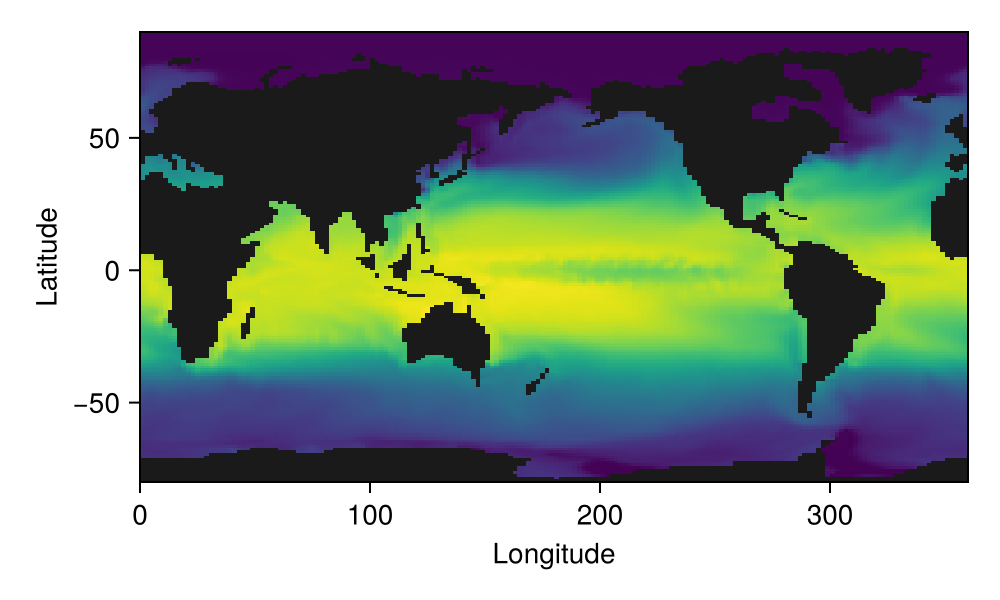

In [35]:
heatmap(c_slice; nan_color=:grey10, figure= (;size = (500,300)))

In [31]:
using Statistics

In [32]:
c_mean = mapslices(mean, c_small, dims="Time")

┌ 180×170 YAXArray{Union{Missing, Float32}, 2} ┐
├──────────────────────────────────────────────┴───────────────────────── dims ┐
  ↓ lon Sampled{Float64} 1.0:2.0:359.0 ForwardOrdered Regular Points,
  → lat Sampled{Float64} -79.5:1.0:89.5 ForwardOrdered Regular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any}()
├──────────────────────────────────────────────────────────── loaded in memory ┤
  data size: 119.53 KB
└──────────────────────────────────────────────────────────────────────────────┘

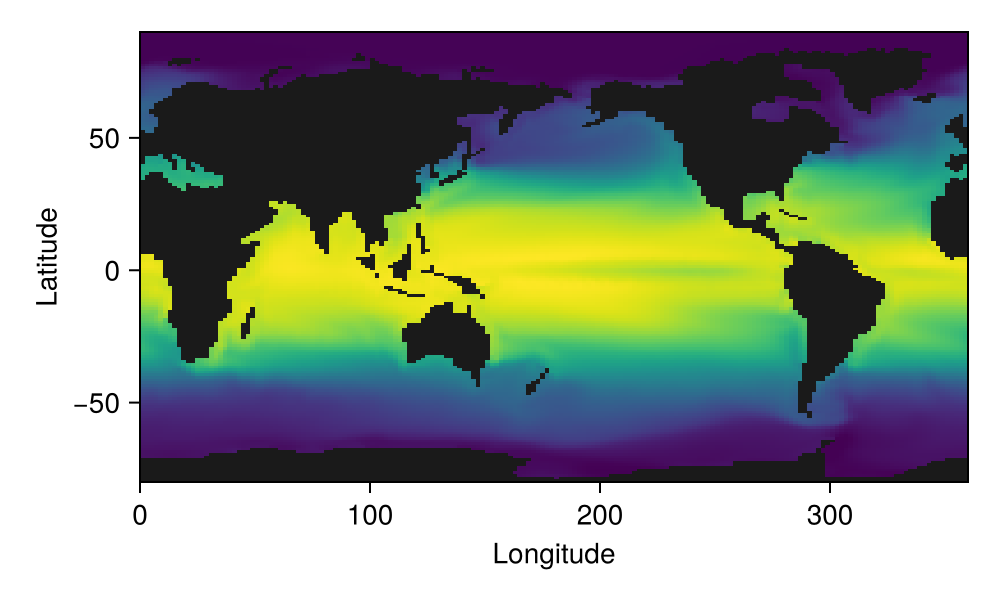

In [36]:
heatmap(c_mean; nan_color=:grey10, figure= (;size = (500,300)))

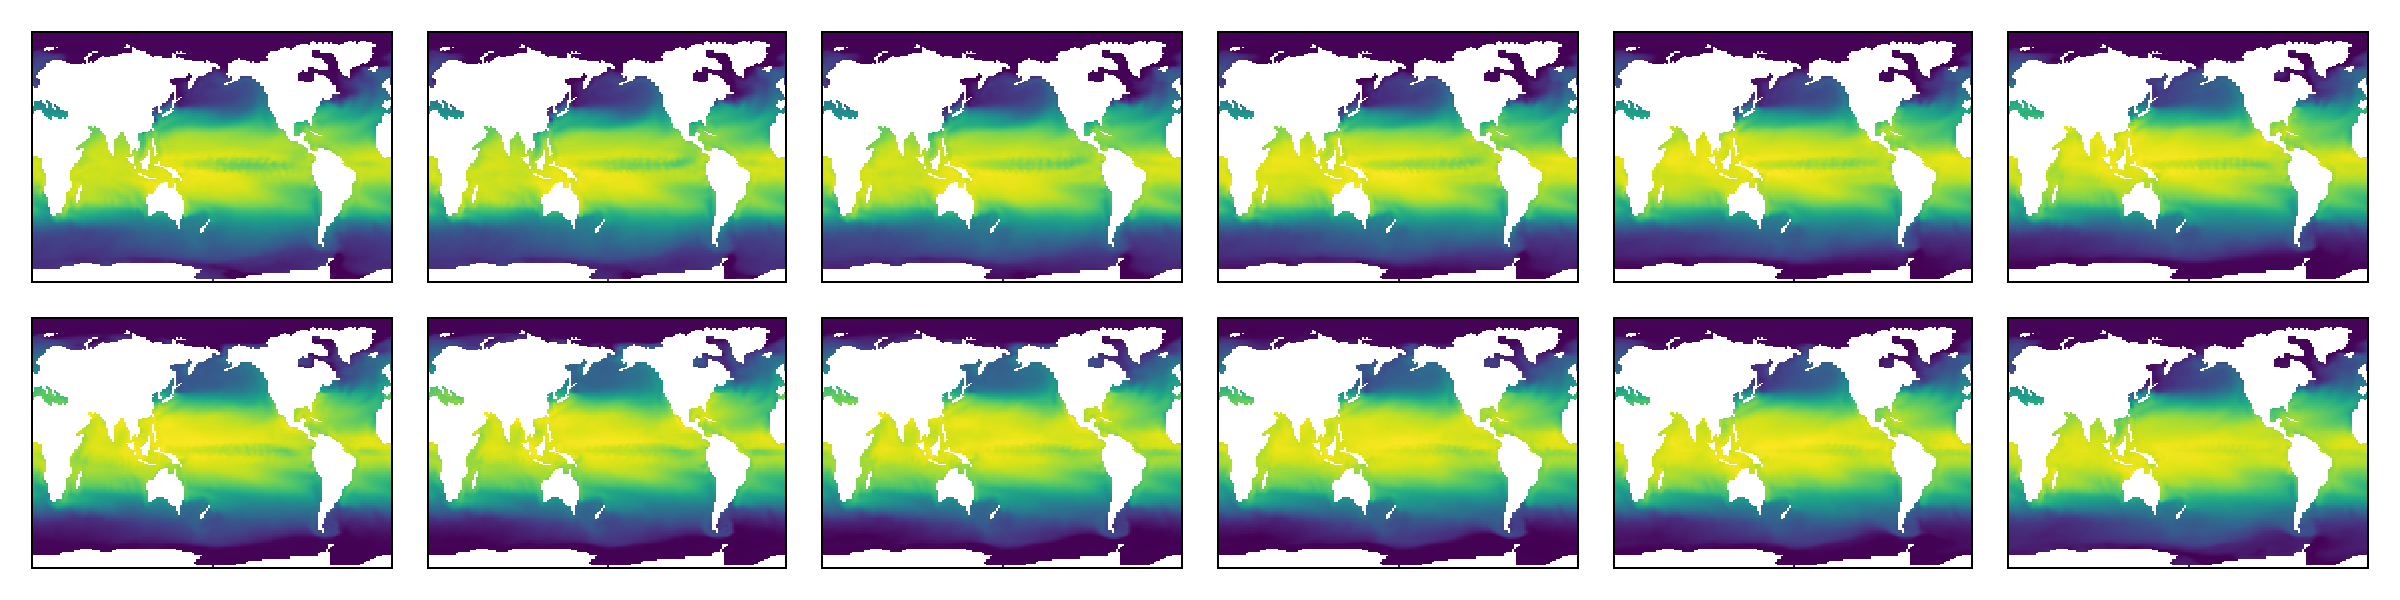

In [38]:
# or, if you to take a look at the first 12 slices, then doing the following will get you there:
# TODO: update with AoG
fig = Figure(; size = (1200, 300))
axs = [Axis(fig[i,j]) for i in 1:2 for j in 1:6]
[heatmap!(axs[i], c_small[Time=i]) for i in 1:12]
hidedecorations!.(axs)
fig

In [39]:
# Now, from c_big
c_big

┌ 384×192×251288 YAXArray{Float32, 3} ┐
├─────────────────────────────────────┴────────────────────────────────── dims ┐
  ↓ lon  Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ time Sampled{DateTime} [2015-01-01T03:00:00, …, 2101-01-01T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (usually, 2 meter) air temperature"


In [40]:
using DimensionalData

In [41]:
c_window = c_big[Time=DateTime("2015-01-01") .. DateTime("2015-01-02")]

┌ 384×192×8 YAXArray{Float32, 3} ┐
├────────────────────────────────┴─────────────────────────────────────── dims ┐
  ↓ lon  Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ time Sampled{DateTime} [2015-01-01T03:00:00, …, 2015-01-02T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (usually, 2 meter) air temperature"
├────

In [42]:
# download data
c_load = readcubedata(c_window)

┌ 384×192×8 YAXArray{Float32, 3} ┐
├────────────────────────────────┴─────────────────────────────────────── dims ┐
  ↓ lon  Sampled{Float64} 0.0:0.9375:359.0625 ForwardOrdered Regular Points,
  → lat  Sampled{Float64} [-89.28422753251364, -88.35700351866494, …, 88.35700351866494, 89.28422753251364] ForwardOrdered Irregular Points,
  ↗ time Sampled{DateTime} [2015-01-01T03:00:00, …, 2015-01-02T00:00:00] ForwardOrdered Irregular Points
├──────────────────────────────────────────────────────────────────── metadata ┤
  Dict{String, Any} with 10 entries:
  "units"         => "K"
  "history"       => "2019-07-21T06:26:13Z altered by CMOR: Treated scalar dime…
  "name"          => "tas"
  "cell_methods"  => "area: mean time: point"
  "cell_measures" => "area: areacella"
  "long_name"     => "Near-Surface Air Temperature"
  "coordinates"   => "height"
  "standard_name" => "air_temperature"
  "_FillValue"    => 1.0f20
  "comment"       => "near-surface (usually, 2 meter) air temperature"
├────

### 3D Plotting

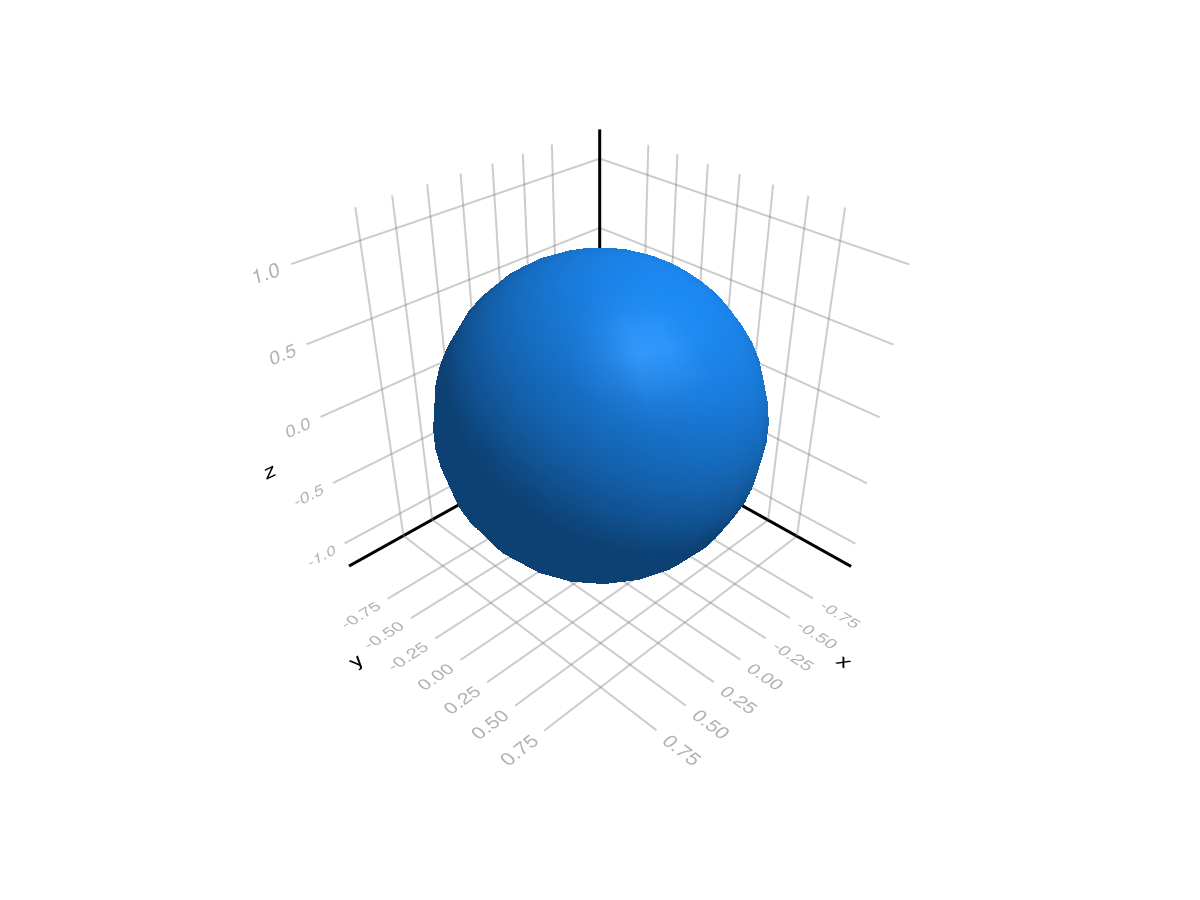

In [43]:
mesh(Sphere(Point3f(0),1); color = :dodgerblue)

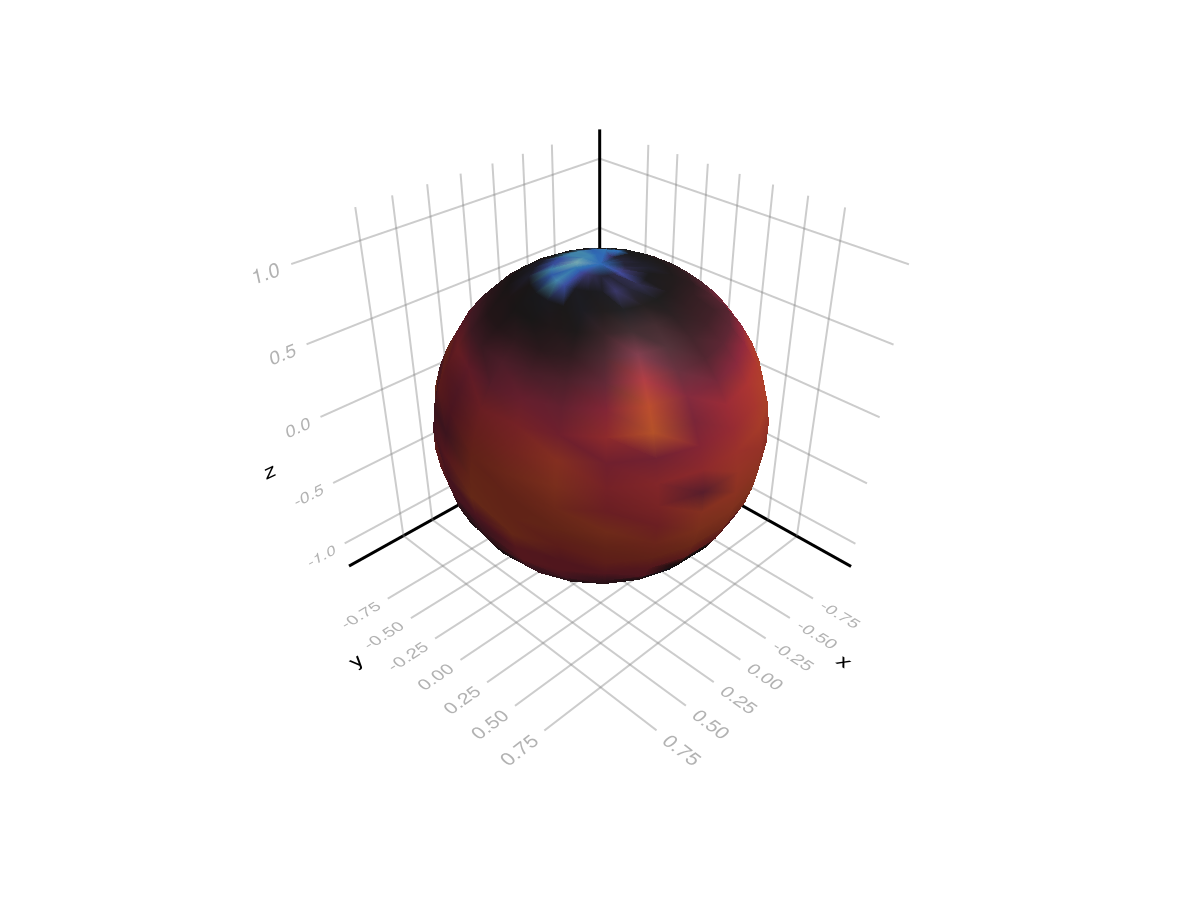

In [45]:
mesh(Sphere(Point3f(0),1); color = rotr90(c_load[:, :,1].data[:,:]),
    colormap = :seaborn_icefire_gradient)

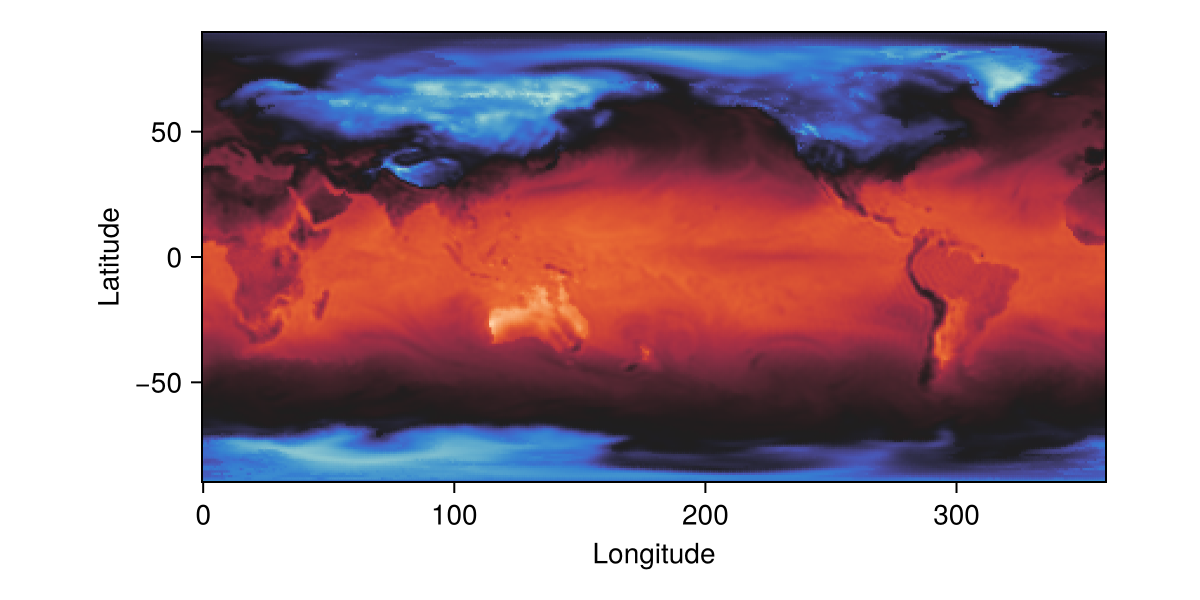

In [46]:
fig, ax, plt = heatmap(c_load[:, :,1]; colormap = :seaborn_icefire_gradient,
    axis = (; aspect=DataAspect()),
    figure = (; size = (600,300)))
fig

Questions?

Projections are also available via GeoMakie

In [60]:
Pkg.add(url="https://github.com/MakieOrg/GeoMakie.jl", rev="master")

     Cloning git-repo `https://github.com/MakieOrg/GeoMakie.jl`
    Updating git-repo `https://github.com/MakieOrg/GeoMakie.jl`
   Resolving package versions...
    Updating `~/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata/Project.toml`
  [db073c08] ~ GeoMakie v0.7.11 ⇒ v0.7.11 `https://github.com/MakieOrg/GeoMakie.jl#master`
    Updating `~/Documents/EGU2025-Julia-intro-and-showcase-for-geoscience/visualization-of-geodata/Manifest.toml`
  [db073c08] ~ GeoMakie v0.7.11 ⇒ v0.7.11 `https://github.com/MakieOrg/GeoMakie.jl#master`
Precompiling project...
  10622.3 ms  ✓ GeoMakie
  1 dependency successfully precompiled in 14 seconds. 409 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version. Otherwise, loading dependents of this package may trigger further precompilation to work with the unexpected version.


In [61]:
using GeoMakie

In [63]:
fig = Figure()
ga = GeoAxis(
    fig[1, 1]; # any cell of the figure's layout
    dest = "+proj=wintri", # the CRS in which you want to plot
)
# lines!(ga, GeoMakie.coastlines()) # plot coastlines from Natural Earth as a reference
# You can plot your data the same way you would in Makie
# scatter!(ga, -120:15:120, -60:7.5:60; color = -60:7.5:60, strokecolor = (:black, 0.2))
fig

MethodError: MethodError: no method matching RGB{FixedPointNumbers.N0f8}(::FixedPointNumbers.N0f8, ::FixedPointNumbers.N0f8, ::FixedPointNumbers.N0f8)
The type `RGB{FixedPointNumbers.N0f8}` exists, but no method is defined for this combination of argument types when trying to construct it.

and basemaps via [Tyler.jl](https://makieorg.github.io/Tyler.jl/dev/getting_started#Figure-size-and-aspect-ratio)

![](https://makieorg.github.io/Tyler.jl/dev/assets/londonFigure.DRPY-Rtv.png)